# Exercise 00 : Line chart

In [1]:
import pandas as pd
import sqlite3

### make a connection to the database (it is the same as the previous day)

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

### run a query that gets the datetime from the pageviews table, selecting only the
users and not the admins

In [3]:
df = pd.read_sql("""
SELECT uid, datetime
FROM pageviews
WHERE uid LIKE 'user_%'
""", con)

In [4]:
df

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


### using Pandas, create a new dataframe where the visits are counted and grouped by date

In [5]:
df = df.astype({'datetime' : 'datetime64[ns]'})

In [6]:
df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d')

In [7]:
df = df.groupby('datetime').size()

### using Pandas method .plot(), create a graph

* the size of the font should be 8
* the size of the figure is (15,8)
* the graph must have the title Views per day
* notice the rotation of xticks on the graph below

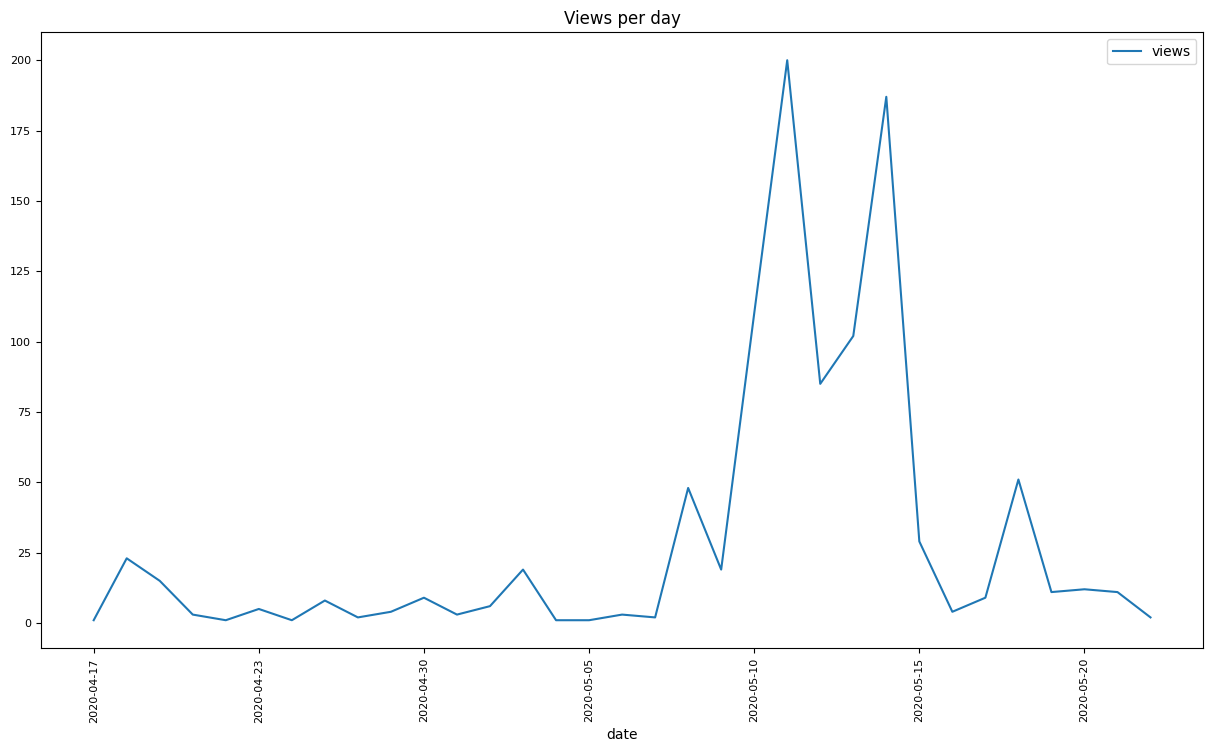

In [8]:
plt = df.plot(
    xlabel='date',
    title="Views per day",
    fontsize=8,
    figsize=(15, 8),
    legend=True,
    label='views',
)
plt.tick_params(axis='x', labelrotation=90)

### close the connection to the database

In [9]:
con.close()